# Tabular Data - Time Series 

Week 4 

Monday 2024-10-21 

Link to [notes](https://meds-eds-220.github.io/MEDS-eds-220-course/book/chapters/lesson-7-time-series.html)

**Objective** We will learn some basic handling of time series. 


## About the data 

Hourly precipitation in the Boulder County, Colorado from 2000 to 2014. There were unusual weather patterns in 2013 that led to devasting floods. 

## Time stamps 

The `pandas` library represents an instant in time using the `pandas.Timestamp` class.

In [1]:
import pandas as pd

# Create a timestamp
pd.Timestamp(year=2024, 
             month=10, 
             day=21, 
             hour=10, 
             minute=1, 
             second=33)

Timestamp('2024-10-21 10:01:33')

When we store multiple `pd.Timestamp` in a pd.series the data type of the column is set to `datetime64`

In [2]:
pd.Series([pd.Timestamp(2020,10,18),
          pd.Timestamp(2020,10,19),
          pd.Timestamp(2020,10,20)])

0   2020-10-18
1   2020-10-19
2   2020-10-20
dtype: datetime64[ns]

## Data exploration 

In [3]:
# Read in precipitation data 
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/main/data/boulder_colorado_2013_hourly_precipitation.csv'
precip = pd.read_csv(URL)

precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,999.99,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.00,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.00,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.00,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.00,,q


<AxesSubplot:>

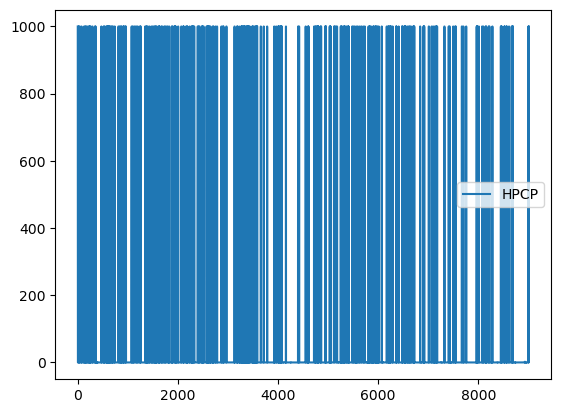

In [5]:
# Plot hourly precipiation in Boulder, Colorado
precip.plot()

Few things happening here:

1. Index: the x axis is given by the data frame, not the relative time 
2. Outliers: it is ploting the NA 999.99 values 
3. Time range: we are only interested in data from 2013.


## Read in missing data values 

Metadata states that 999.99 indicates missing values. We can reload the df indicating that 999.99 is the missing value by using `na_values` parameter in the `pd.read_csv` function. 

In [6]:
# Read in CSV indicating the NA values 
precip = pd.read_csv(URL, na_values  =[999.99])

# Check it worked 
precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,NaN,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.0,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.0,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.0,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.0,,q


<AxesSubplot:>

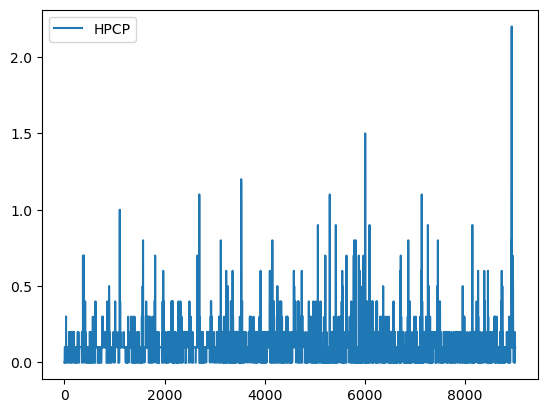

In [7]:
# Now plot it again w/o the NA values 
precip.plot()

## Convert stings into dates 

Notice that the `DATE` column in our data frame is not of type `datetime:`

In [8]:
# Check the DATE column data type 
precip.dtypes

STATION              object
STATION_NAME         object
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

Remember that the object dtype means that (most likely) all values in that column are strings. We can easily convert strings to datetime objects using the pandas.to_datetime() function:

pandas.to_datetime() input: a pandas.Series with strings that can be converted to dates
pandas.to_datetime() output: a pandas.Series with the strings converted to datetime objects

In [9]:
# Convert DATE column to timestamps
precip['DATE'] = pd.to_datetime(precip.DATE)

# Check DATE column data type 
precip.dtypes

STATION                     object
STATION_NAME                object
DATE                datetime64[ns]
HPCP                       float64
Measurement Flag            object
Quality Flag                object
dtype: object

<AxesSubplot:xlabel='DATE'>

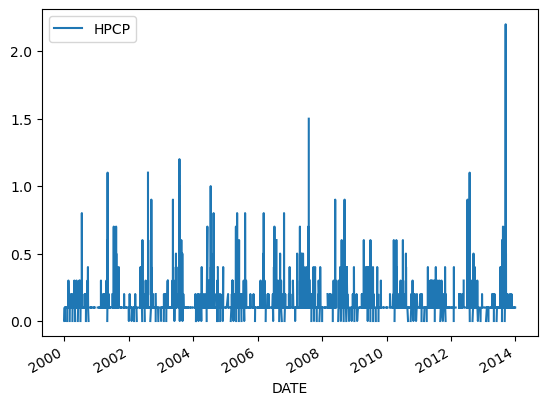

In [10]:
# Plot hourly precip 
precip.plot(x='DATE', y='HPCP')

Next, we want to set the `DATE` column as the index 

In [11]:
precip = precip.set_index('DATE')

In [12]:
# Insepct new index
precip.head()

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2000-01-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2000-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2000-01-02 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 05:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q


<AxesSubplot:xlabel='DATE'>

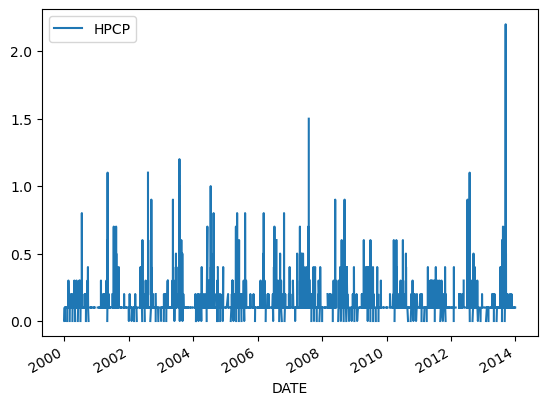

In [13]:
precip.plot()

## Leverage pandas.read_csv() to set a known index

If we already have information about our data frame and know which column we will use as the index, we can directly set the index when we load the data by using:
```python
df = pandas.read_csv(file, index_col=['index_column'])
```

If we also need our index to be of type datetime and we have a known dates column, then we can also create a datetime index directly when loading the data:
```python
df = pandas.read_csv(file, index_col=['date_column'], parse_dates=['date_column'])
```

In [14]:
'''
This is how you do multi-line comments in code blocks
Read in Boulder, CO hourly precip data 
HPCP = hourly precip (unique numerical column in df)
'''

df = pd.read_csv(URL,
                na_values=[999.99],
                index_col=['DATE'],
                parse_dates=['DATE'])

## Subsetting by date

pandas has great functionality to subset a dataframe when using a time index.

Example
We can use ``.loc[year-month]` to select data from a specific year and month:

In [15]:
# Select precip data from Sept 2013 
precip.loc['2013-09']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-09-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-09-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-09-01 00:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,],
2013-09-01 01:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,[,
2013-09-01 00:00:00,COOP:055121,LONGMONT 6 NW CO US,NaN,},
...,...,...,...,...,...
2013-09-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.2,,
2013-09-27 10:00:00,COOP:050843,BOULDER 2 CO US,0.1,,
2013-09-27 15:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


<AxesSubplot:xlabel='DATE'>

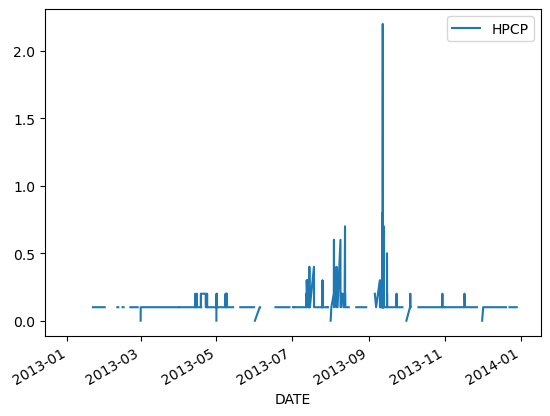

In [16]:
# Plot 2013 hourly precip data 
precip.loc['2013'].plot()

## Resample

Resampling a time series means converting a time series from one frequency to another. 


For example:

- monthly to yearly (downsampling) 
- weekly to daily (upsampling). 

We can resample with the `resample() method`. The simplest use is to call:

```python
df.resample(new_frequency).aggregator_function()
```

where: 

- `new_frequency` is a string representing the new frequence to resample the data. For example, 'D' for day, 'w' for week, 'M' for month, and 'Y' for year.
- `aggregator_function()` is the function we will use to aggregate the data into a new frequency. For example `min()`, `max()`, `sum()`, ...

The `resample()` method works similarly to `group_by()`

Example: 
Our 2013 precip data was hourly frequency, we want to resample it to daily precip:

In [17]:
# Resample 2013 hourly data to daily frequency: no output
precip.loc['2013'].resample('D')

In [18]:
# Total daily precipitation in 2013
daily_precip_2013 = precip.loc['2013'].resample('D').sum()

daily_precip_2013.head()

,HPCP
DATE,
2013-01-01,0.0
2013-01-02,0.0
2013-01-03,0.0
2013-01-04,0.0
2013-01-05,0.0


Our index now is every day in the year. 

<AxesSubplot:title={'center':'Precipitation in Boulder, CO (2013)'}, xlabel=' ', ylabel='Daily precipitation (inches) '>

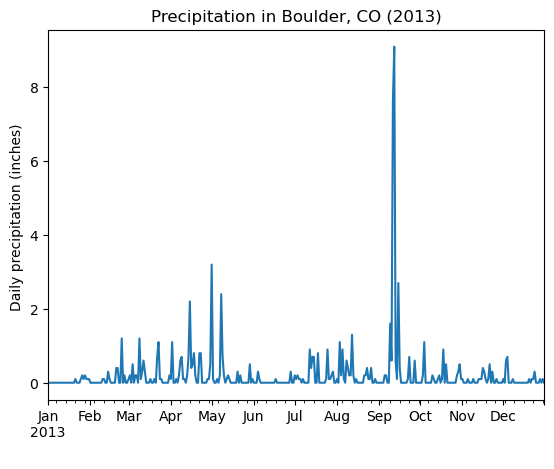

In [19]:
# Plot our data 
daily_precip_2013.plot(ylabel='Daily precipitation (inches) ',
                      xlabel= ' ', # how to remove label on axis
                      title= 'Precipitation in Boulder, CO (2013)',
                      legend= False)

## Complete workflow


The previous code includes a lot of exploratory functions and trials. While it is important to keep our data exploration documented, once we are certain of our data wrangling, we can *streamline* our analyses to only include the code that **directly contributes to the output**. Moving on, we will start to collect all our relevant code to create such complete workflows. For this lesson, the code below will produce the final graph:

<AxesSubplot:title={'center':'Precipitation in Boulder, CO during 2013'}, xlabel=' ', ylabel='daily precipitation (in)'>

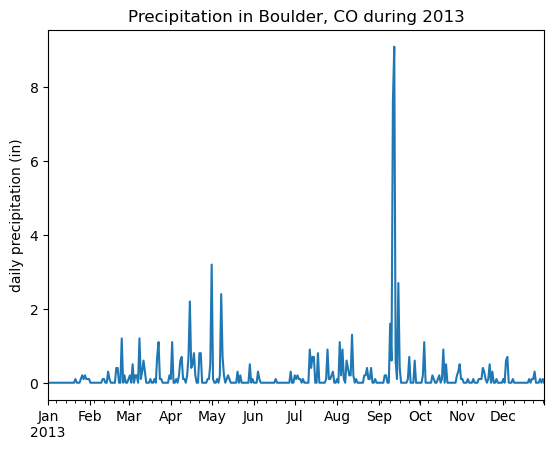

In [20]:
import pandas as pd

'''
Read in Boulder, CO hourly precipitation data 
HPCP = hourly precipitation (unique numerical column in data frame)
'''
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/main/data/boulder_colorado_2013_hourly_precipitation.csv'
precip = pd.read_csv(URL, 
                    na_values=[999.99],  # Known from metadata
                    index_col=['DATE'], 
                    parse_dates=['DATE']
                    )


# Calculate daily total precipitation during 2013
daily_precip_2013 = (precip.loc['2013']
                            .resample('D')
                            .sum()
                            .rename(columns={'HPCP':'daily_precipitation'})  
                            )

# Plot time series
daily_precip_2013.plot(ylabel='daily precipitation (in)', 
                       xlabel=' ',
                       title='Precipitation in Boulder, CO during 2013',
                       legend=False)